<a href="https://colab.research.google.com/github/Vishal1711/AuE893-Deep-Learning-Application-in-Engineering/blob/main/AuE8930_Mini_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project 2

Welcome to your second Mini-Project! You will use numpy to build neural networks to predict the house price in Boston. Look for "TODO" inside the code block and complete the required tasks.

---
**Note**: In this project you can **ONLY** use numpy and matplotlib packages.

## Problem Description
 This data was collected in 1978 and each of the 506 entries represents aggregate information about homes from various suburbs located in Boston. Once you get a good fit, you can use this model to predict the monetary value of a house located at the Boston’s area. A model like this would be very valuable for a real state agent who could make use of the information provided in a dayly basis.

The dataset will be like:

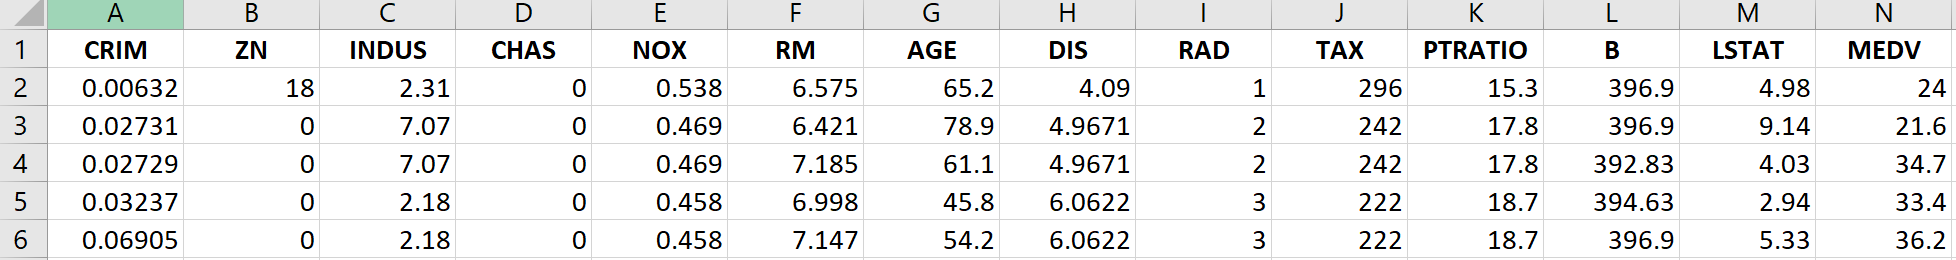

**Features**:
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000usd
- PTRATIO: pupil-teacher ratio by town
- B: $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
- LSTAT: percentage lower status of the population

**Label**:
- MEDV: This is the median value of owner-occupied homes in $1000s

In [1]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

## Task 1: Read and Preprocess Data

In this section, you will implement the `DataPreprocessing` utility class to provide the training data and the test data for the downstream regressor based on Neural Networks.

### Task 1.1: Implement utility class

**Requirements:**

- Use `np.fromfile('filename.data', sep=" ")` to read data.
- Usually, the raw dataset will be **randomly** divided into training set and test set according to the given size of the training set.
- **Min-max scaler** transforms features X by scaling each feature to a given range $[a, b]$. The transformation is given by:
$$X_{\text{std}}=\frac{X - X_{\text{min}}}{X_{\text{max}}-X_{\text{min}}}$$
$$X_{\text{scaled}}=X_{\text{std}}\cdot(b-a) + a$$

In [2]:
class DataPreProcessing:
    def __init__(self):
      pass

    @staticmethod
    def read_data(file, separator):
      data = np.fromfile(file, sep=" ")                 # Reading the .data file
      return data

        # """
        # Use the Numpy function from file() to load the dataset from the given file.
        
        # Parameters
        # ----------
        # file: string
        #     String path of the data file.
        # separator: string
        #     Separator between items if file is a text file.

        # Return
        # ----------
        # data: ndarray
        #     Data read from the given file.
        # """
        # TODO: write your code here

    @staticmethod
    def train_test_split(data, train_size, shuffle=True):

      data = np.reshape(data, (506,14))               # Reshape dataset in table format
      if shuffle==True:
        np.random.shuffle(data)                       # Shuffle data
      else:
        data = data                        
      data = data.T
      row, columns = data.shape
      split = int((train_size)*columns)
      train_data = data[:,:split]                     #  Split train_data
      test_data = data[:,split:]                      # split test_data

      return train_data, test_data
  
        # """
        # Split the given data into random train and test subsets. 
        
        # Parameters
        # ----------
        # data: ndarray
        #     Input of the given data.
        # train_size: float
        #     The proportion of the dataset to include in the train split.
        # shuffle: bool
        #     Whether or not to shuffle the data before splitting.

        # Return
        # ----------
        # train_data: ndarray
        #     Output of the training data.
        # test_data: ndarray
        #     Output of the test data.
        # """
        # TODO: write your code here


    @staticmethod
    def minmax_scale(X, feature_range=(0, 1)):
      row, col = X.shape
      lst = []
      for i in range(row):
        X_min = min(X[i,:])                           # Minimum value of X 
        X_max = max(X[i,:])                           # Maximum calue of X
        for k in range(col):
          X[i,k] = (X[i,k]-X_min)/(X_max - X_min)     # Minmax scaler
          X[i,k] = X[i,k]*(b-a)+a 
          lst.append(X[i,k])  

      arr = np.array(lst)
      X_scaled = np.reshape(arr, (row,col))

      return X_scaled


        # """
        # Transform features X by scaling each feature to a given range. 
        
        # Parameters
        # ----------
        # data: ndarray
        #     Input of the given data.
        # feature_range: tuple
        #     Desired range of transformed data.

        # Return
        # ----------
        # X_scaled: ndarray
        #     Output of the scaled features.
        # """
        # TODO: write your code here

### Task 1.2 Apply utility class

Apply your implemented utility class to complete the data reading and preprocessing.

**Requirements**:
- `X_train` should be an $n\times m$ matrix where $n$ is the number of features and $m$ is the number of training examples. In this project, $n=13$ and $m=\lfloor0.8\times506\rfloor$.
- The shape of `y_train` should be $1\times m$ where $m$ is the number of training examples.
- `X_test` and `y_test` should have the similar shape.

In [3]:
# Init the train size
train_size = 0.8

# TODO: init an object of DataPreProcessing
if __name__ == '__main__':

# TODO: read the data from the data file
  data = DataPreProcessing.read_data('housing.data'," ")        # File name and seperator as input
  

# TODO: split the data random train and test subsets.
  train_data, test_data = DataPreProcessing.train_test_split(data, train_size, True)


# TODO: split the training subset into X_train and y_train
  X_train = train_data[:13,:]
  y_train = train_data[-1:,:]

# TODO: split the test subset into X_test and y_test
  X_test = test_data[:13,:]
  y_test = test_data[-1:,:]
  

# TODO: 0-1 scale X_train and X_test respectively
  a = 0
  b = 1
  X_train = DataPreProcessing.minmax_scale(X_train, feature_range=(a, b))
  X_test = DataPreProcessing.minmax_scale(X_test, feature_range=(a, b))


In [4]:
# Test code
assert X_train.shape == (13, 404), "X_train should be a 13 by 404 matrix."
assert y_train.shape == (1, 404), "y_train should be a 1 by 404 matrix."
assert X_test.shape == (13, 102), "X_test should be a 13 by 102 matrix."
assert y_test.shape == (1, 102), "y_test should be a 1 by 102 matrix."

print('Great')

Great


## Task 2: Shallow Neural Network
In this task, you will create a shallow neural network with **only one hidden layer** to predict the Boston house price.

### Task 2.1: Initialize model parameters
Since the model is a two-layer (one hidden layer and an output layer) neural network, model parameters will be $W_1$, $b_1$, $W_2$, and $b_2$. In this task, you should implement a function of `init_params` to create a dictionary which is used to save model parameters and initialize parameters based on [He method](https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78).

**Hints:**
- $W_1$ should be an $l_1\times l_0$ matrix where $l_1$ is the hidden layer size and $l_0$ is the feaure dimension of input samples.
- $b_1$ should be an $l_1\times1$ matrix.
- $W_2$ and $b_2$ should have the silimar dimensionality.
- Use `np.random.randn()` to generate random values.

In [5]:
def init_params(input_layer_size, hidden_layer_size, output_layer_size):

  # Initialize W1, b1, W2 and b2 using He method

  W1 = np.dot(np.random.randn(hidden_layer_size,input_layer_size),np.sqrt(2/input_layer_size))    # Weights for hidden layer
  b1 = np.zeros((hidden_layer_size,1))                                                            # bias for hidden layer
  W2 = np.random.randn(output_layer_size,hidden_layer_size)*np.sqrt(2/hidden_layer_size)          # Weights for output layer
  b2 = np.zeros((output_layer_size,1))                                                            # bias for output layer
  return W1, b1, W2, b2

    # """
    # Initialize model parameters based on He initialization method.
        
    # Parameters
    # ----------
    # input_layer_size: int
    #     Number of features in the input sample.
    # hidden_layer_size: int
    #     Number of neurons in the hidden layer.
    # output_layer_size: int
    #     Number of neurons in the output layer.

    # Return
    # ----------
    # W1: ndarray
    #     Output of initialized W1.
    # b1: ndarray
    #     Output of initialized b1.
    # W2: ndarray
    #     Output of initialized W2.
    # b2: ndarray
    #     Output of initialized b2.
    # """
    # TODO: write your code here


### Task 2.2: Implement ReLU activation function
ReLU is the most common activation function used in neural networks. Implement the ReLU function and use it in your model.
$$a = \begin{cases}
   z &\text{if } z>0 \\
   0 &\text{if } z\le0
\end{cases}$$

$$\frac{da}{dz} = \begin{cases}
   1 &\text{if } z>0 \\
   0 &\text{if } z\le0
\end{cases}$$

In [6]:
def relu(Z, derivative=False):
  if derivative==False:
    A = np.maximum(Z,0)                       # Output for derivative=False
  else:
    A = np.ones(Z.shape)                      # Output for derivative=True
    A[Z<0] = 0

  return A
  
    # """
    # If derivative=False, return the result transformed by the ReLU function.
    # If derivative=True, return the result transformed by the derivative of the ReLU function.

    # Parameters
    # ----------
    # Z: ndarray
    #     Input of the given data.
    # derivative: bool.
    #     Whether or not to take the derivative of the ReLU function.

    # Return
    # ----------
    # A: ndarray
    #     Output of the transformed matrix.
    # """
    # TODO: write your code here


### Task 2.3: Implement forward propagation function
The forward function is used to define how your model is going to be run, from input to output.

**Hints:**
- Computations in the forward propagation:
$$Z^{[1]}=W^{[1]}X+b^{[1]}$$
$$A^{[1]}=g(Z^{[1]})$$
$$Z^{[2]}=W^{[2]}A^{[1]}+b^{[2]}$$
$$\hat{y}=g(Z^{[2]})$$
where $g()$ is the ReLU activation function.

In [7]:
def forward(X, W1, b1, W2, b2):

  Z1 =  np.dot(W1,X)+ b1                              # Output of the hidden layer before applying activation function
  A1 = relu(Z1,derivative=False)                      # ReLU function on Z of hidden layer
  Z2 = np.dot(W2,A1)+b2                               # Output of the hidden layer before applying activation function
  A2 = relu(Z2,derivative=False)                      # ReLU function on Z of output layer
  
  return Z1, A1, Z2, A2

    # """
    # Generates output predictions for the input samples with given params.
        
    # Parameters
    # ----------
    # X: ndarray
    #     Input samples with shape of n x m where n is the feature dimension 
    #     and m is the number of samples.
    # W1: ndarray
    #     Weights of the hidden layer.
    # b1: ndarray
    #     Intercepts of the hidden layer.
    # W2: ndarray
    #     Weights of the output layer.
    # b2: ndarray
    #     Intercepts of the output layer.

    # Return
    # ----------
    # Z1: ndarray
    #     Output of the hidden layer before applying activation function.
    # A1: ndarray
    #     Output of the hidden layer
    # Z2: ndarray
    #     Output of the output layer before applying activation function.
    # A2: ndarray
    #     Output of the output layer.
    # """
    # TODO: write your code here


### Task 2.4: Implement loss function
For this regression problem, we will use mean squared error (MSE) as the loss function.
$$J=\frac{1}{2m}\sum_{i=1}^m\left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

In [8]:
def loss(y_truth, y_pred):
  m = y_truth.shape[1]
  loss = (0.5/m)*np.sum(np.square(y_pred - y_truth))      # Mean square for loss function

  return loss

    # """
    # Return the mean squared error between the ground truth and predictions.
        
    # Parameters
    # ----------
    # y_truth: ndarray
    #     An 1 x m matrix of ground truth.
    # y_pred: ndarray
    #     An 1 x m matrix of predictions.

    # Return
    # ----------
    # loss: float
    #     Output of the mean squared error.
    # """
    # TODO: write your code here

### Task 2.5: Implement backpropagation function
The backward calculates the gradient of the loss function with respect to the neural network's weights and intercepts.


In [9]:
def backward(X, y, Z1, A1, Z2, A2, W1, b1, W2, b2):
  m = X.shape[1]
  dZ2 = np.multiply(A2 - y, relu(Z2, derivative=True))      # Gradients of weigths at the output layer
  dW2 = (1/m)*np.dot(dZ2, A1.T)
  db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
  x1 = np.dot(W2.T,dZ2)
  x2 = relu(Z1, derivative=True)
  dZ1 =  np.multiply(x1,x2)                                 # Gradients of weigths at the hidden layer
  dW1 = (1/m)*np.dot(dZ1,X.T)
  db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)

  return dW1, db1, dW2, db2

    # """
    # Return the gradient of the loss function with respect to the model's weights.
        
    # Parameters
    # ----------
    # X: ndarray
    #     Input samples with shape of n x m where n is the feature dimension 
    #     and m is the number of samples.
    # y: ndarray
    #     An 1 x m matrix of ground truth.
    # Z1: ndarray
    #     Output of the hidden layer before applying activation function.
    # A1: ndarray
    #     Output of the hidden layer.
    # Z2: ndarray
    #     Output of the output layer before applying activation function.
    # A2: ndarry
    #     Output of the output layer.
    # W1: ndarray
    #     Weights of the hidden layer.
    # b1: ndarray
    #     Intercepts of the hidden layer.
    # W2: ndarray
    #     Weights of the output layer.
    # b2: ndarray
    #     Intercepts of the output layer.

    # Return
    # ----------
    # dW1: ndarray
    #     Gradients of weiths at the hidden layer.
    # db1: ndarray
    #     Gradients of intercepts at the hidden layer.
    # dW2: ndarray
    #     Gradients of weiths at the output layer.
    # db2: ndarray
    #     Gradients of intercepts at the output layer.
    # """
    # TODO: write your code here
    

### Task 2.6: Implement update function
In this part, we will update model parameters according to the generated gradients.
$$W:=W-\alpha\cdot dW$$
$$b:=b-\alpha\cdot db$$

In [10]:
def update(lr, W1, b1, W2, b2, dW1, db1, dW2, db2):

  W1 = W1-(lr*dW1)                              # Update weights in hidden layer
  W2 = W2-(lr*dW2)                              # Update weights in output layer 
  b1 = b1 - (lr*db1)                            # Update bias in hidden layer
  b2 = b2 - (lr*db2)                            # Update bias in output layer

  return W1, W2, b1, b2 


    # """
    # Return updated parameters based on the gradient descent optimization. 
        
    # Parameters
    # ----------
    # lr: float
    #     Learning rate.
    # W1: ndarray
    #     Weights of the hidden layer.
    # b1: ndarray
    #     Intercepts of the hidden layer.
    # W2: ndarray
    #     Weights of the output layer.
    # b2: ndarray
    #     Intercepts of the output layer.
    # dW1: ndarray
    #     Gradients of weiths at the hidden layer.
    # db1: ndarray
    #     Gradients of intercepts at the hidden layer.
    # dW2: ndarray
    #     Gradients of weiths at the output layer.
    # db2: ndarray
    #     Gradients of intercepts at the output layer.

    # Return
    # ----------
    # W1_: ndarray
    #     Updated weights of the hidden layer.
    # b1_: ndarray
    #     Updated intercepts of the hidden layer.
    # W2_: ndarray
    #     Updated weights of the output layer.
    # b2_: ndarray
    #     Updated intercepts of the output layer.
    # """
    # TODO: write your code here


### Task 2.7: Implement train function
So far, you have implemented functions that are required to train the neural network model. It's time to organize them and complete the training step. Let's keep moving on!

**Note:** Since you have learned how to create small batches in Mini-Project 1, just directly use the given `create_batches()`.

In [11]:
def create_batches(X, y, batch_size):
    # """
    # Split the data X and y with given batch size.

    # Parameters
    # ----------
    # X: ndarray
    #     Features with shape n by m.
    # y: ndarray
    #     Labels with shape k by m.
    # batch_size: int
    #     Batch size.

    # Return
    # ----------
    # batches_X: list
    #     Created small batches of X.
    # batches_y: list
    #     Created small batches of y.
    # """
    # Get the number of examples
    m = X.shape[1]
    # Get label dimension
    k = y.shape[0]

    # Init variables to save batches
    batches_X = []
    batches_y = []
    
    # Combine X and y
    data = np.vstack((X, y))
    np.random.shuffle(data.T)
        
    # Calcuate the number of mini batches
    n_minibatches = m // batch_size 

    for i in range(n_minibatches): 
        mini_batch = data[:, i * batch_size:(i + 1) * batch_size]        
        batches_X.append(mini_batch[:-k, :])
        batches_y.append(mini_batch[-k:, :])
        
    # Handle the rest data
    if m % batch_size != 0: 
        mini_batch = data[:, n_minibatches * batch_size:]        
        batches_X.append(mini_batch[:-k, :])
        batches_y.append(mini_batch[-k:, :])
        batches_X, batches_y
    
    return batches_X, batches_y

In [12]:
def train(X_train, y_train, X_test, y_test, W1, b1, W2, b2, lr, batch_size, epochs):
  training_loss_history = []
  test_loss_history = []

  for i in range(epochs):                                                             # Loop for no. of Epochs
    training_loss_one = []
    test_loss_one = []
    batches_X1, batches_y1 = create_batches(X_train, y_train, batch_size)             # Training data batches creation
    batches_X2, batches_y2 = create_batches(X_test, y_test, batch_size)               # Test data batches creation
    for k in range(len(batches_X1)):     
      Z1, A1, Z2, A2 = forward(batches_X1[k], W1, b1, W2, b2)                         # Forward propogation for training datatset
      training_loss_history1 = loss(batches_y1[k], A2)                                # Calculation of loss function for input dataset (training)
      dW1, db1, dW2, db2 = backward(batches_X1[k], batches_y1[k], Z1, A1, Z2, A2, W1, b1, W2, b2)   # Backward propogation 
      W1, W2, b1, b2 = update(lr, W1, b1, W2, b2, dW1, db1, dW2, db2)                               # Update the model parametrs W1, W2, b1 and b2 
      training_loss_one.append(np.mean(training_loss_history1))                                     # Calculation of training loss

    training_loss_history.append(np.mean(training_loss_one))                           # Mean of loss in training data set
    
    for l in range(len(batches_X2)):
      Z1, A1, Z2, A2 = forward(batches_X2[l], W1, b1, W2, b2)                          # Forward propogation for test dataset
      test_loss_history1 = loss(batches_y2[l], A2)                                     # Calculation of loss function for input testing dataset
      test_loss_one.append(np.mean(test_loss_history1))
    
    test_loss_history.append(np.mean(test_loss_one))                                   # Mean of loss in test dataset

  return training_loss_history, test_loss_history
    
    # """
    # Train the model based on the mini-batch gradient descent.

    # Parameters
    # ----------
    # X_train: ndarray
    #     Features of the training data with shape n by m1.
    # y_train: ndarray
    #     Labels of the training data with shape 1 by m1.
    # X_test: ndarray
    #     Features of the training data with shape n by m2.
    # y_test: ndarray
    #     Labels of the training data with shape 1 by m2.
    # W1: ndarray
    #     Initial weights of the hidden layer.
    # b1: ndarray
    #     Initial intercepts of the hidden layer.
    # W2: ndarray
    #     Initial weights of the output layer.
    # b2: ndarray
    #     Initial intercepts of the output layer.
    # lr: float
    #     Learning rate.
    # batch_size: int
    #     Batch size.
    # epochs: int
    #     Number of epochs to train the model. An epoch is an iteration over 
    #     the entire x and y data provided.

    # Return
    # ----------
    # training_loss_history: list
    #     Each entry stands for the average training loss of all iterations in a certain epoch.
    # test_loss_history: list
    #     A record of test losses.
    # """
    # TODO: write your code here
    

In [13]:
# Init hyperparameters
epochs = 200
lr = 0.001
batch_size = 64
hidden_layer_size = 13
input_layer_size = 13
output_layer_size = 1

# TODO: initialize model parameters

W1, b1, W2, b2 = init_params(input_layer_size, hidden_layer_size, output_layer_size)       # Initialize model parameters


# TODO: train the model
training_loss_history_plot, test_loss_history_plot = train(X_train, y_train, X_test, y_test, W1, b1, W2, b2, lr, batch_size, epochs)   # Train the model
print('Training loss after last epoch',training_loss_history_plot[-1])
print('Testing loss after last epoch',test_loss_history_plot[-1])

Training loss after last epoch 13.953333399300673
Testing loss after last epoch 17.28555960878697


### Task 2.8: Run your network
Congratulations! You have done everything to build a neural network. Run your model and plot the training losses and test lossses in the **same** figure where x-axis is epoch. 

### Task 2.9: Visualize training process

Plot out the training loss curve and the test loss curve in the same figure.

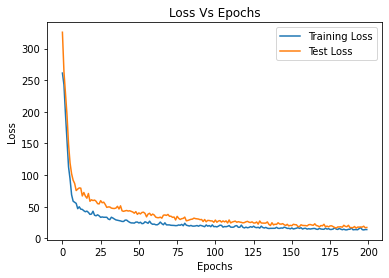

In [14]:
# TODO: plot the training history

plt.plot(training_loss_history_plot)        # Plotting training loss
plt.plot(test_loss_history_plot)            # Plotting Test Loss
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.title("Loss Vs Epochs")
plt.legend(['Training Loss', 'Test Loss'])
plt.show()

## Task 3: Deep Neural Network
Hopefully, you have mastered shallow neural networks after finishing Task 2. Let's move to the deep neural network. In this task, you will be asked to implement the `DNN` class that can be utilized to create deep neural networks with the given model configuration.

### Task 3.1: Implement DNN class
Unlike Task 2, you should try another programming model called Object-oriented programming (OOP). Don't be overwhelmed with the following code. You can efficiently complete this task by reusing most of your code in Task 2.

In [15]:
from numpy.lib.function_base import gradient
class DNN:
    def __init__(self, input_size, layer_sizes, epochs=100, lr=0.001, batch_size=64):
        """
        Parameters
        ----------
        input_size: int
            Number of features in the inputs.
        layer_sizes: list
            Number of units in each hidden layer and the output. 
        epochs: int
            Number of epochs to train the model
        lr: float
            Learning rate.
        batch_size: int
            Batch size.
        """
        self.input_size = input_size
        self.layer_sizes = layer_sizes
        self.batch_size = batch_size
        self.epochs = epochs
        self.lr = lr

        # Init model parameters
        self.params = self._init_params()
    
    def _init_params(self):
      W = {}                          # Initialize W as dictionary
      b = {}                          # Initialize b as dictionary

      for i in range(len(layer_sizes)):
        if i ==0:                                                                             # Weight and bias creation using He method for first hidden layer
          W["key%s" %i] = np.dot(np.random.randn(layer_sizes[i],input_size),np.sqrt(2/input_size))
          b["key%s" %i] = np.zeros((layer_sizes[i],1))
        else:                                                                                # Weight and bias creation using He method for layers other than first hidden layer
          W["key%s" %i] = np.dot(np.random.randn(layer_sizes[i],layer_sizes[i-1]),np.sqrt(2/layer_sizes[i-1]))
          b["key%s" %i] = np.zeros((layer_sizes[i],1))
      self.W = W
      self.b = b
      return W, b

        # """ 
        # Initialize model parameters based on He method.

        # Return
        # ----------
        # params: dict
        #     Initialized model parameters represented by key-value pairs.
        # """
        # TODO: write your code here


    
    def _relu(self, Z, derivative=False):

        if derivative==False:
          A = np.maximum(Z,0)                       # Output for derivative=False
        else:
          A = np.ones(Z.shape)                      # Output for derivative=True
          A[Z<0] = 0

        return A

        # """
        # If derivative=False, return the result transformed by the ReLU function.
        # If derivative=True, return the result transformed by the derivative of the ReLU function.

        # Parameters
        # ----------
        # Z: ndarray
        #     Input of the given data.
        # derivative: bool.
        #     Whether or not to take the derivative of the ReLU function.

        # Return
        # ----------
        # A: ndarray
        #     Output of the transformed matrix.
        # """
        # TODO: write your code here

    def _forward(self, X):
      Z = {}
      A = {}
      for i in range(len(layer_sizes)):
        if i ==0:
          Z["key%s" %i] =  np.dot(self.W["key%s" %i],X)+self.b["key%s" %i]       # Output of the first hidden layer before applying activation function
          A["key%s" %i] = self._relu(Z["key%s" %i],derivative=False)             # ReLU function on output of first hidden layer
        else:                                                                    
          Z["key%s" %i] = np.dot(self.W["key%s" %i],A["key%s" %(i-1)])+self.b["key%s" %i]     # Output of the other layers before applying activation function
          A["key%s" %i] = self._relu(Z["key%s" %i],derivative=False)                          # ReLU function on output of first hidden layer

      self.Z = Z
      self.A = A
      return Z, A

        # """
        # Generates output predictions for the input samples with given params.
            
        # Parameters
        # ----------
        # X: ndarray
        #     Input samples with shape of n x m where n is the feature dimension 
        #     and m is the number of samples.

        # Return
        # ----------
        # output_layers: dict
        #     Outputs of each layer represented by key-value pairs.
        # """
        # TODO: write your code here

    
    @staticmethod
    def mse(y_truth, y_pred):

      m = y_truth.shape[1]
      loss = (0.5/m)*np.sum(np.square(y_pred - y_truth))           # Mean square for loss function

      return loss

        # """
        # Return the mean squared error between the ground truth and predictions.
            
        # Parameters
        # ----------
        # y_truth: ndarray
        #     An 1 x m matrix of ground truth.
        # y_pred: ndarray
        #     An 1 x m matrix of predictions.

        # Return
        # ----------
        # loss: float
        #     Output of the mean squared error.
        # """
        # # TODO: write your code here

    
    def _backward(self, X, y, output_layers):
      dW = {}
      dZ = {}
      db = {}
      m = X.shape[1]
      for i in range(len(layer_sizes)-1,-1,-1):
        if i==(len(layer_sizes)-1):                                               # Backprop on output layer
          dZ["key%s" %i] = np.multiply(self.A["key%s" %i] - y, relu(self.Z["key%s" %i], derivative=True))
          dW["key%s" %i] = (1/m)*np.dot(dZ["key%s" %i], self.A["key%s" %(i-1)].T)
          db["key%s" %i] = (1/m)*np.sum(dZ["key%s" %i], axis=1, keepdims=True)
        elif i==0:                                                                # Backprop on first hidden layer
          dZ["key%s" %i] = np.multiply(np.dot(self.W["key%s" %(i+1)].T,dZ["key%s" %(i+1)]), relu(self.Z["key%s" %(i)], derivative=True))
          dW["key%s" %i] = (1/m)*np.dot(dZ["key%s" %i], X.T)
          db["key%s" %i] = (1/m)*np.sum(dZ["key%s" %i], axis=1, keepdims=True) 
        else:                                                                     # Backprop on two hidden layer
          dZ["key%s" %i] = np.multiply(np.dot(self.W["key%s" %(i+1)].T,dZ["key%s" %(i+1)]), relu(self.Z["key%s" %i], derivative=True))
          dW["key%s" %i] = (1/m)*np.dot(dZ["key%s" %i], self.A["key%s" %(i-1)].T)
          db["key%s" %i] = (1/m)*np.sum(dZ["key%s" %i], axis=1, keepdims=True)                

      self.dZ = dZ
      self.dW = dW
      self.db = db

      return dW, db

        # """
        # Return the gradient of the loss function with respect to the model's weights.
            
        # Parameters
        # ----------
        # X: ndarray
        #     Input samples with shape of n x m where n is the feature dimension 
        #     and m is the number of samples.
        # y: ndarray
        #     An 1 x m matrix of ground truth.
        # output_layers: dict
        #     Outputs of each layer represented by key-value pairs.

        # Return
        # ----------
        # gradients: dict
        #     Gradients of weights and intercepts at each layers.
        # """
        # TODO: write your code here
    

    def _update(self, dW, db):
      for i in range(len(layer_sizes)):
        self.W["key%s" %i] =  self.W["key%s" %i] - (lr*self.dW["key%s" %i] )        # Weight updatation after backprop
        self.b["key%s" %i] = self.b["key%s" %i] - (lr*self.db["key%s" %i])          # Bias updatation after backprop


        # """
        # Update network parameters according to the update rule of gradient descent. 
            
        # Parameters
        # ----------
        # gradients: dict
        #     Parameter gradients.
        # """
        # TODO: write your code here
    
    def train(self, X_train, y_train, X_test, y_test):

      training_loss_history = []
      test_loss_history = []

      for i in range(epochs):                                                                         # For loop for no. of epochs
        training_loss_one = []
        test_loss_one = []
        batches_X1, batches_y1 = self._create_batches(X_train, y_train)                                # Training data batches creation
        batches_X2, batches_y2 = self._create_batches(X_test, y_test)                                  # Test data batches creation
        for k in range(len(batches_X1)):                                  
          Z = self._forward(batches_X1[k])                                                              # Forward propogation for training datatset
          training_loss_history1 = self.mse(batches_y1[k], self.A["key%s" %(len(layer_sizes)-1)])       # Calculation of loss function for input dataset (training)
          dW, db = self._backward(batches_X1[k], batches_y1[k], self.A["key%s" %(len(layer_sizes)-1)])  # Backward propogation 
          self._update(self.dW, self.db)                                                                # Updatation after backprop
          training_loss_one.append(np.mean(training_loss_history1))                                     # Calculation of training loss

        for l in range(len(batches_X2)):
          Z = self._forward(batches_X2[l])                                                              # Forward prop on test dataset
          test_loss_history1 = self.mse(batches_y2[l], self.A["key%s" %(len(layer_sizes)-1)])           #  Loss calculation on test datatest
          test_loss_one.append(np.mean(test_loss_history1))

        training_loss_history.append(np.mean(training_loss_one))                                         # Mean of loss in training data set
        test_loss_history.append(np.mean(test_loss_one))                                                 # Mean of loss in test data set

      # training_loss_history.append(training_loss_one)
      # test_loss_history.append(test_loss_one)

      return training_loss_history, test_loss_history

        # """
        # Train the model based on mini-batch graient descent.

        # Parameters
        # ----------
        # X_train: ndarray
        #     Features of the training data with shape n by m1.
        # y_train: ndarray
        #     Labels of the training data with shape 1 by m1.
        # X_test: ndarray
        #     Features of the training data with shape n by m2.
        # y_test: ndarray
        #     Labels of the training data with shape 1 by m2.

        # Return
        # ----------
        # training_loss_history: list
        #     Entries are average training losses of all iterations in one epoch.
        # test_loss_history: list
        #     A record of test loss values.
        # """
        # TODO: write your code here
        
    
    def _create_batches(self, X, y):
        # """
        #     Split X and y into small batches with given batch size.

        #     Parameters
        #     ----------
        #     X: ndarray
        #         Features with shape n by m.
        #     y: ndarray
        #         Labels with shape k by m.
        #     batch_size: int
        #         Batch size.

        #     Return
        #     ----------
        #     batches_X: list
        #         Created small batches of X.
        #     batches_y: list
        #         Created small batches of y.
        # """
        # Get the number of examples
        m = X.shape[1]
        # Get label dimension
        k = y.shape[0]

        # Init variables to save batches
        batches_X = []
        batches_y = []
        
        # Combine X and y
        data = np.vstack((X, y))
        np.random.shuffle(data.T)
            
        # Calcuate the number of mini batches
        n_minibatches = m // batch_size 

        for i in range(n_minibatches): 
            mini_batch = data[:, i * batch_size:(i + 1) * batch_size]        
            batches_X.append(mini_batch[:-k, :])
            batches_y.append(mini_batch[-k:, :])
            
        # Handle the rest data
        if m % batch_size != 0: 
            mini_batch = data[:, n_minibatches * batch_size:]        
            batches_X.append(mini_batch[:-k, :])
            batches_y.append(mini_batch[-k:, :])
            
        return batches_X, batches_y

### Task 3.2: Run your model
Run your model and plot the training losses and test lossses in the **same** figure where x-axis is epoch. 

In [16]:
# Init hyperparameters
epochs = 200
lr = 0.001
batch_size = 64
layer_sizes = [15, 13, 8, 1]
input_size = 13                   # Eqault to number of input features

# TODO: create an instance of your DNN class
objDNN= DNN(input_size, layer_sizes, epochs=200, lr=0.001, batch_size=64)        

# TODO: train the model
training_loss_historyDNN, test_loss_historyDNN = objDNN.train(X_train, y_train, X_test, y_test)
print('Training Loss of DNN',training_loss_historyDNN[-1])
print('Testing loss of DNN',test_loss_historyDNN[-1])


Training Loss of DNN 7.649066316977624
Testing loss of DNN 5.286258523462804


### Task 3.3: Visualize performance

Plot out the training loss curve and the test loss curve in the same figure.

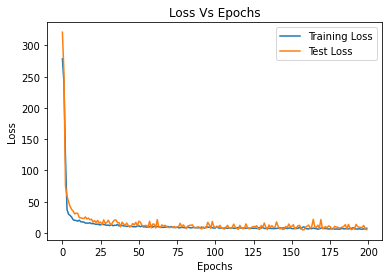

In [17]:
# TODO: plot the training history
iterations =range(0,epochs)                   # Plot acrross number of epochs
plt.plot(iterations,training_loss_historyDNN) # Plotting training loss history
plt.plot(iterations,test_loss_historyDNN)     # Plotting test loss history
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.title("Loss Vs Epochs")
plt.legend(['Training Loss', 'Test Loss'])
plt.show()